In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


***Part 1.***
Load and process the concerned data, you will use 
time_series_covid_19_confirmed

---





In [343]:
dataset = pd.read_csv("datasets_494724_1202764_time_series_covid_19_confirmed.csv")

#method to drop coulmns after "5/27/20"
def get_index_of_col():
  for i in range(len(dataset.columns)):
    if (dataset.columns[i] == "5/27/20"):
      return i

index = get_index_of_col()
dataset = dataset.iloc[:,:index+1]

#Grouping coulumns according to country and sorting it according to the highest number of cases
dataset_used = dataset.groupby("Country/Region").sum().sort_values(by=["5/27/20"], ascending=False)

#Dropping columns that are not needed like Lat, Long
dataset_used = dataset_used.drop(["Lat","Long"], axis=1)
print("The dataset with coulmns till 5/27/20 are as follows: ","\n")
print(dataset_used)
print("\n")


The dataset with coulmns till 5/27/20 are as follows:  

                  1/22/20  1/23/20  1/24/20  ...  5/25/20  5/26/20  5/27/20
Country/Region                               ...                           
US                      1        1        2  ...  1662302  1680913  1699176
Brazil                  0        0        0  ...   374898   391222   411821
Russia                  0        0        0  ...   353427   362342   370680
United Kingdom          0        0        0  ...   262547   266599   268619
Spain                   0        0        0  ...   235400   236259   236259
...                   ...      ...      ...  ...      ...      ...      ...
Seychelles              0        0        0  ...       11       11       11
Western Sahara          0        0        0  ...        9        9        9
MS Zaandam              0        0        0  ...        9        9        9
Papua New Guinea        0        0        0  ...        8        8        8
Lesotho                 0      

***Part 2.***
Identify 5 most related countries that have a similar trend of infection as Pakistan

---






In [344]:

# dataset_used = dataset_used.reset_index()
#Method to find index of Country/Region Pakistan
# def index_pakistan():
#   for i in range(len(dataset_used)):
#     if (dataset_used["Country/Region"].iloc[i] == "Pakistan"):
#       return i

#Finding top five most correlated countries wto pakistan
def Top_five_corr_with_pak(index):
  corr = dataset_used.corrwith(dataset_used.iloc[index], axis=1)
  corr = corr.sort_values(ascending=False)
  return corr.head(6)


# index = index_pakistan()
# print(index)
most_corr_countries = Top_five_corr_with_pak(17)
print("top 5 countries (till 5/27/20) which have same spread trend as Pakistan are as follows: ","\n")
print(most_corr_countries)
print("\n")


top 5 countries (till 5/27/20) which have same spread trend as Pakistan are as follows:  

Country/Region
Pakistan        1.000000
Saudi Arabia    0.998967
Qatar           0.998740
Colombia        0.998703
Peru            0.998608
Egypt           0.998586
dtype: float64




***Part 2.2.***
Checking the trend in most correlated countries to Pakistan.



Graph of the cumulative confirmed cases' trends close to that of Pakistan:  





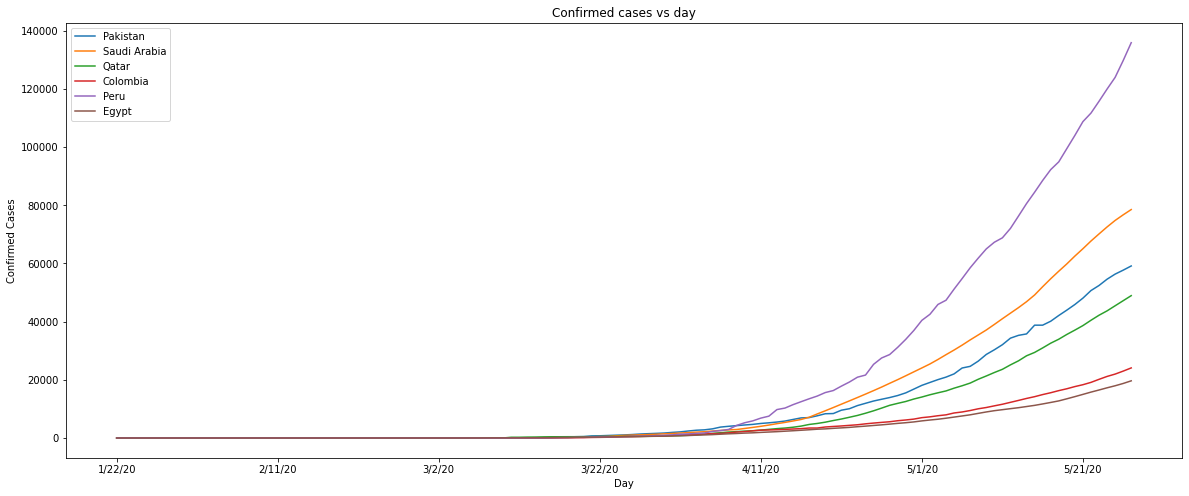

In [393]:
#CHECKING THE MOST CORRELATED COUNTRIED IN TERMS OF TRENDS WITH PAKISTAN

# dataset_used = dataset_used.reset_index()
array = ["Pakistan", "Saudi Arabia", "Qatar", "Colombia", "Peru", "Egypt"]
# a = dataset_used.loc['US'].name
# print(a)

datagram = pd.DataFrame()

for index,val in enumerate(array):
  if (dataset_used.loc[val].name == val):
    datagram[val] = dataset_used.loc[val]
print("\n")
print("Graph of the cumulative confirmed cases' trends close to that of Pakistan: ", "\n")

datagram.plot.line(figsize=(20,8))
plt.title("Confirmed cases vs day")
plt.ylabel("Confirmed Cases")
plt.xlabel("Day")
print("\n")

***Part 3.***
Use the data of these countries to predict the spread of Coronavirus in Pakistan

---






In [0]:
from pandas.plotting import register_matplotlib_converters
from torch import nn, optim
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn.functional as F

***Part 3.1.***
Data Pre-processing; separating the data of different countries and getting daily cases

In [347]:
Five_countries = dataset_used
#Dataset of the five countries having similar trend to Pakistan
Five_countries = Five_countries.loc[["Saudi Arabia", "Qatar", "Colombia", "Peru", "Egypt"], :]

#Dataset of Pakistan
dataset_Pakistan = dataset_used.loc[["Pakistan"], :]

dataset_Pakistan.columns = pd.to_datetime(dataset_Pakistan.columns)
Five_countries.columns = pd.to_datetime(Five_countries.columns)


#Method to convert cumulative sum into daily sum for the top five countries
# def daily_cases(data):
#   for i in range(len(data)):
#     data.iloc[i,:] = data.iloc[i,:].diff().fillna(data.iloc[i,:]).astype(np.int64)
#   return data


# Five_countries = daily_cases(Five_countries)
# print("Daily cases for the top five similar countries are as follows: ","\n")
# print(Five_countries)
# print("\n\n")


#Daily dataset of Top five countries
Saudia_daily_cases = Five_countries.loc[["Saudi Arabia"], :]
Qatar_daily_cases = Five_countries.loc[["Qatar"], :]
Colombia_daily_cases = Five_countries.loc[["Colombia"], :]
Peru_daily_cases = Five_countries.loc[["Peru"], :]
Egypt_daily_cases = Five_countries.loc[["Egypt"], :]


#Daily cases of the top five countries having similar trend


Saudia_daily_cases = Saudia_daily_cases.sum(axis=0)
Saudia_daily_cases = abs(Saudia_daily_cases.diff().fillna(Saudia_daily_cases[0]).astype(np.int64))
print("Total daily cases of  Saudia: ","\n")
print(Saudia_daily_cases)
print("\n\n")


Qatar_daily_cases = Qatar_daily_cases.sum(axis=0)
Qatar_daily_cases = abs(Qatar_daily_cases.diff().fillna(Qatar_daily_cases[0]).astype(np.int64))
print("Total daily cases of  Qatar: ","\n")
print(Qatar_daily_cases)
print("\n\n")


Colombia_daily_cases = Colombia_daily_cases.sum(axis=0)
Colombia_daily_cases = abs(Colombia_daily_cases.diff().fillna(Colombia_daily_cases[0]).astype(np.int64))
print("Total daily cases of  Colombia: ","\n")
print(Colombia_daily_cases)
print("\n\n")



Peru_daily_cases = Peru_daily_cases.sum(axis=0)
Peru_daily_cases = abs(Peru_daily_cases.diff().fillna(Peru_daily_cases[0]).astype(np.int64))
print("Total daily cases of  Peru: ","\n")
print(Peru_daily_cases)
print("\n\n")


Egypt_daily_cases = Egypt_daily_cases.sum(axis=0)
Egypt_daily_cases = abs(Egypt_daily_cases.diff().fillna(Egypt_daily_cases[0]).astype(np.int64))
print("Total daily cases of  Egypt: ","\n")
print(Egypt_daily_cases)
print("\n\n")

#Daily Cases of Pakistan

# Pakistan_daily_cases = daily_cases(dataset_Pakistan)
# print("Daily cases for Pakistan are as follows: ", "\n")
# print(Pakistan_daily_cases)
# print("\n\n")

#Getting the daily case of pakistan from 10th may 2020 till 27th may 2020

# Pakistan_daily_cases.columns.get_loc("2020-05-10")
Pakistan_daily_cases = dataset_Pakistan
Pakistan_daily_cases = Pakistan_daily_cases.iloc[:,109:]
Pakistan_daily_cases = Pakistan_daily_cases.sum(axis=0)
Pakistan_daily_cases = abs(Pakistan_daily_cases.diff().fillna(Pakistan_daily_cases[0]).astype(np.int64))
print("Total daily cases of  pakistan: ","\n")
Pakistan_daily_cases = Pakistan_daily_cases.iloc[1:]
print(Pakistan_daily_cases)



# Five_countries = Five_countries.sum(axis=0)
# Five_countries = abs(Five_countries.diff().fillna(Five_countries[0]).astype(np.int64))
# print("Total daily cases of the five countries having similar trend to pakistan: ","\n")
# print(Five_countries)

Total daily cases of  Saudia:  

2020-01-22       0
2020-01-23       0
2020-01-24       0
2020-01-25       0
2020-01-26       0
              ... 
2020-05-23    2442
2020-05-24    2399
2020-05-25    2235
2020-05-26    1931
2020-05-27    1815
Length: 127, dtype: int64



Total daily cases of  Qatar:  

2020-01-22       0
2020-01-23       0
2020-01-24       0
2020-01-25       0
2020-01-26       0
              ... 
2020-05-23    1732
2020-05-24    1501
2020-05-25    1751
2020-05-26    1742
2020-05-27    1740
Length: 127, dtype: int64



Total daily cases of  Colombia:  

2020-01-22       0
2020-01-23       0
2020-01-24       0
2020-01-25       0
2020-01-26       0
              ... 
2020-05-23    1046
2020-05-24     998
2020-05-25     806
2020-05-26    1022
2020-05-27    1101
Length: 127, dtype: int64



Total daily cases of  Peru:  

2020-01-22       0
2020-01-23       0
2020-01-24       0
2020-01-25       0
2020-01-26       0
              ... 
2020-05-23    4056
2020-05-24    4205
202

***Part 3.2.***
Scaling the entire datasets in order to increase the speed of training and testing

In [0]:

#Scaling the data in order to increase the speed of the model 

scaling = MinMaxScaler()
scaling1 = scaling.fit(np.expand_dims(Saudia_daily_cases, axis=1))
scaling2 = scaling.fit(np.expand_dims(Qatar_daily_cases, axis=1))
scaling3 = scaling.fit(np.expand_dims(Colombia_daily_cases, axis=1))
scaling4 = scaling.fit(np.expand_dims(Peru_daily_cases, axis=1))
scaling5 = scaling.fit(np.expand_dims(Egypt_daily_cases, axis=1))

#Training Data
Saudia_training_data = scaling1.transform(np.expand_dims(Saudia_daily_cases, axis=1))
Qatar_training_data = scaling2.transform(np.expand_dims(Qatar_daily_cases, axis=1))
Colombia_training_data = scaling3.transform(np.expand_dims(Colombia_daily_cases, axis=1))
Peru_training_data = scaling4.transform(np.expand_dims(Peru_daily_cases, axis=1))
Egypt_training_data = scaling5.transform(np.expand_dims(Egypt_daily_cases, axis=1))

#Testing Data
testing_data = scaling.transform(np.expand_dims(Pakistan_daily_cases, axis=1))

#Converting training data into tensors
Saudia_training_data = torch.FloatTensor(Saudia_training_data)
Qatar_training_data = torch.FloatTensor(Qatar_training_data)
Colombia_training_data = torch.FloatTensor(Colombia_training_data)
Peru_training_data = torch.FloatTensor(Peru_training_data)
Egypt_training_data = torch.FloatTensor(Egypt_training_data)

#Converting testing data into tensors
testing_data = torch.FloatTensor(testing_data)


***Part 3.3.***
Creating the datasets, separting data and the labels from the training data

In [0]:

#Method that creates dataset, take first 5 points as data and the next as label and makes small packages of entire dataset
def create_datasets(dataset, dataset_len):
    data_set = []
    length = len(dataset)

    for i in range(length - dataset_len):
        data = dataset[i:i+dataset_len]
        label = dataset[i+dataset_len]
        data_set.append((data ,label))

    return data_set

#Training data normalized converted into a datset of data and labels
Saudia_dataset_train = create_datasets(Saudia_training_data, 10)
Qatar_dataset_train = create_datasets(Qatar_training_data, 10)
Colombia_dataset_train = create_datasets(Colombia_training_data, 10)
Peru_dataset_train = create_datasets(Peru_training_data, 10)
Egypt_dataset_train = create_datasets(Egypt_training_data, 10)



***Part 3.4.*** LSTM Model

In [0]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size))
        

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

***Part 3.5.*** Training and predicting the cases in Pakistan according to the top Five countries

**1. According to Suadia Arabia**

`Training Model`

In [351]:
#Training the model according to the Dataset of Saudia Arabia

LSTM_model = LSTM()
loss_function = nn.MSELoss()
optimizer = optim.Adam(LSTM_model.parameters(), lr=0.01)

num_losses = 0

for epoch in range(100):
  for i, batch in enumerate(Saudia_dataset_train):
    data, labels = batch
    optimizer.zero_grad()
    LSTM_model.hidden_cell = (torch.zeros(1, 1, LSTM_model.hidden_layer_size),
                          torch.zeros(1, 1, LSTM_model.hidden_layer_size))
    preds = LSTM_model(data)

    loss = loss_function(preds, labels)
    loss.backward()

    optimizer.step()

    num_losses += loss.item()
  
  if epoch%10 == 0:
    print("Epoch: ",epoch+10,"           ","Training Loss: ",num_losses)
  num_losses = 0  
   

Epoch:  10             Training Loss:  2.8600847275896655
Epoch:  20             Training Loss:  55.52101511968067
Epoch:  30             Training Loss:  17.80961668152358
Epoch:  40             Training Loss:  4.446935156747713
Epoch:  50             Training Loss:  2.197321583975423
Epoch:  60             Training Loss:  1.1517526297610203
Epoch:  70             Training Loss:  1.3213767109757555
Epoch:  80             Training Loss:  3.1070978310895043
Epoch:  90             Training Loss:  2.4160813726796277
Epoch:  100             Training Loss:  4.001463884625261


`Predicting for Pakistan from 10th May till 27th May`


In [352]:
#Evaluating the already trained model on the data of Pakistan and predicting trend in Pakistan between 10th may till 27th may

predictions = []

LSTM_model.eval()
for data in Saudia_training_data:
  with torch.no_grad():
    pred = LSTM_model(data)
    predictions.append(pred)

#Inversing the previously transformed dataset so, that the outputs predicted can be according to the original value
pak_predictions_Saudia = scaling.inverse_transform(np.expand_dims(predictions, axis=0)).flatten()
pak_predictions_Saudia = pak_predictions_Saudia[-17:]
print(pak_predictions_Saudia)

[2079.762  2020.9023 2055.9353 2314.546  2608.59   2840.0647 2756.2615
 2715.372  2675.051  2779.7554 2669.4893 2760.837  2602.6128 2618.7395
 2395.784  1871.74   1976.0404]


In [353]:
#For forecasting we would keep the data of last 31 days from the training set 
#These would predict 31 days in the future of Pakistan


days_in_future = 31
prediction = []
Saudia_outputs = Saudia_daily_cases.tolist()

LSTM_model.eval()
for i in range (days_in_future):
  pred_list = torch.FloatTensor(Saudia_outputs[-days_in_future:])
  with torch.no_grad():
    pred = LSTM_model(pred_list)
    pred_item = pred.item()
    Saudia_outputs.append(pred_item)

Saudia_outputs = scaling.inverse_transform(np.expand_dims(Saudia_outputs[-days_in_future:], axis=0)).flatten()
print(Saudia_outputs)




[3039.43203211 2190.78792572 2003.90604496 2299.18051004 2677.02031612
 2874.8081708  2920.88263988 2939.99125481 2954.96654749 2967.06320286
 2977.09721088 2985.58558941 2992.80930281 2998.99073601 3004.31040049
 3008.90910387 3012.95433998 3016.37711525 3019.35446978 3021.95431232
 3024.21504498 3026.13753557 3027.78188229 3029.23552036 3030.54227591
 3031.71516657 3032.74746656 3033.63028049 3034.36512709 3034.94289398
 3034.89668131]


`Graph`

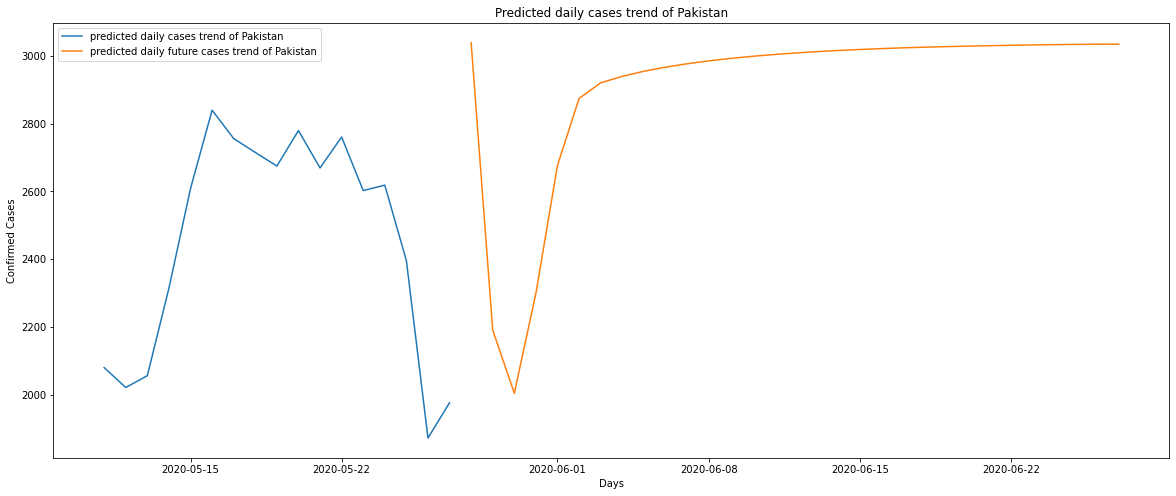

In [354]:
#Daily predicted cases of Pakistan according to Saudia till 27th June 2020

hist_data_index = pd.date_range(
  start= '2020-05-10',
  end = '2020-05-27',
  closed='right'
)

daily_cases_five_countries = pd.Series(
  data= pak_predictions_Saudia,
  index= hist_data_index
)

#Days in Future
Pak_future_index = pd.date_range(
  start= '2020-05-27',
  end = '2020-06-27',
  closed='right'
)


Pak_future = pd.Series(
  data=Saudia_outputs,
  index=Pak_future_index
)

plt.figure(figsize=(20,8))
plt.title('Predicted daily cases trend of Pakistan')
plt.xlabel('Days')
plt.ylabel('Confirmed Cases')
plt.plot(daily_cases_five_countries, label='predicted daily cases trend of Pakistan')
plt.plot(Pak_future, label='predicted daily future cases trend of Pakistan')
plt.legend()

**2. According to Qatar**

`Training Model`

In [355]:
#Training the model according to the Dataset of Qatar

LSTM_model = LSTM()
loss_function = nn.MSELoss()
optimizer = optim.Adam(LSTM_model.parameters(), lr=0.001)
num_losses = 0

for epoch in range(100):
  for i, batch in enumerate(Qatar_dataset_train):
    data, labels = batch
    optimizer.zero_grad()

    LSTM_model.hidden_cell = (torch.zeros(1, 1, LSTM_model.hidden_layer_size),
                          torch.zeros(1, 1, LSTM_model.hidden_layer_size))
    preds = LSTM_model(data)


    loss = loss_function(preds, labels)
    loss.backward()

    
    optimizer.step()

    num_losses += loss.item()
    
  if epoch%10 == 0:
    print("Epoch: ",epoch+10,"           ","Training Loss: ",num_losses)
  num_losses = 0
   

Epoch:  10             Training Loss:  4.3845875095179
Epoch:  20             Training Loss:  2.5373450014370498
Epoch:  30             Training Loss:  2.204753353924275
Epoch:  40             Training Loss:  1.9833251047337512
Epoch:  50             Training Loss:  1.8760799801854091
Epoch:  60             Training Loss:  1.843115441893751
Epoch:  70             Training Loss:  1.7396061235872367
Epoch:  80             Training Loss:  1.6745202394549779
Epoch:  90             Training Loss:  1.579116957752717
Epoch:  100             Training Loss:  1.426310458939433


`Predicting for Pakistan from 10th May till 27th May`

In [356]:
#Evaluating the already trained model on the data of Pakistan and predicting trend in Pakistan between 10th may till 27th may

predictions = []
LSTM_model.eval()
for data in Qatar_training_data:
  with torch.no_grad():
    pred = LSTM_model(data)
    predictions.append(pred)

#Inversing the previously transformed dataset so, that the outputs predicted can be according to the original value
pak_predictions_Qatar = scaling.inverse_transform(np.expand_dims(predictions, axis=0)).flatten()
pak_predictions_Qatar = pak_predictions_Qatar[-17:]
print(pak_predictions_Qatar)

[1226.4652 1333.5973 1426.4897 1355.8718 1554.2294 1541.2992 1516.8102
 1401.4349 1000.5226 1499.6907 1793.0217 1623.0663 1540.8267  992.9268
 1081.1539 1795.506  1817.1902]


`Predicting for Pakistan from 27th May till 27th June`

In [357]:
#For forecasting we would keep the data of last 31 days from the training set 
#These would predict 31 days in the future of Pakistan

days_in_future = 31
prediction = []
Qatar_outputs = Qatar_daily_cases[-days_in_future:].tolist()


LSTM_model.eval()
for i in range (days_in_future):
  pred_list = torch.FloatTensor(Qatar_outputs[-days_in_future:])

  with torch.no_grad():
    pred = LSTM_model(pred_list)
    pred_item = pred.item()
    Qatar_outputs.append(pred_item)

Qatar_outputs = scaling.inverse_transform(np.expand_dims(Qatar_outputs[-days_in_future:], axis=0)).flatten()
print(Qatar_outputs)




[1701.72484636 1537.20013618 1753.94711971 1608.51019621 1695.86560011
 1520.26264906 1360.28305292 1721.91609621 1802.8093195  1656.67226315
 1420.86786747  928.61871719 1197.87631512 1857.43204832 1684.95875835
 1568.17542791 1104.01555538  643.30964625 1175.52304983 1791.2600565
 1570.12807608 1508.28054905 1018.88009548  598.86862159 1273.18778515
 1721.02525473 1393.22227478 1421.58535719  866.96151912  583.73364568
 1391.74303532]


`Graph`

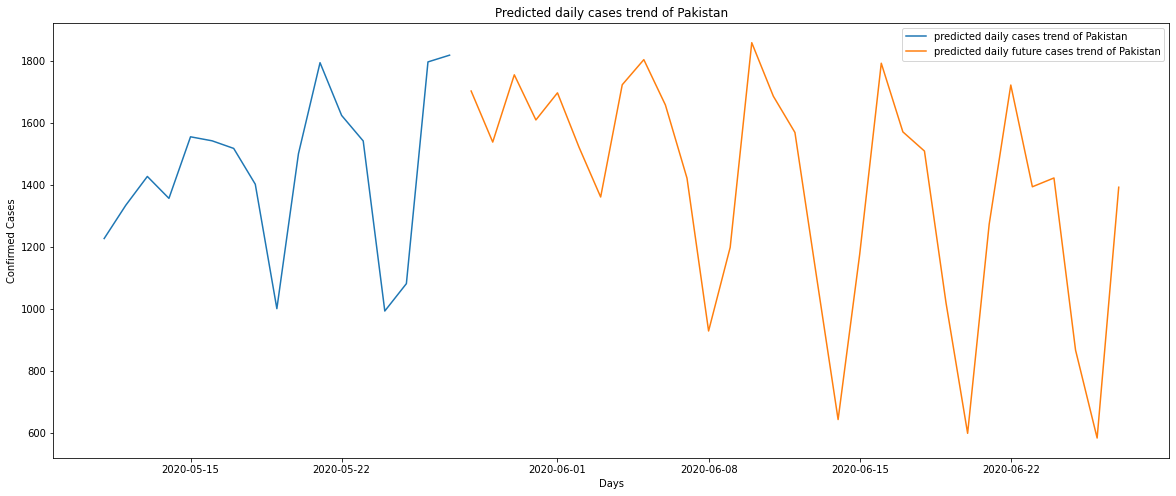

In [358]:
#Daily predicted cases of Pakistan according to Qatar till 27th June 2020

hist_data_index = pd.date_range(
  start= '2020-05-10',
  end = '2020-05-27',
  closed='right'
)

daily_cases_five_countries = pd.Series(
  data= pak_predictions_Qatar,
  index= hist_data_index
)

#Days in Future
Pak_future_index = pd.date_range(
  start= '2020-05-27',
  end = '2020-06-27',
  closed='right'
)


Pak_future = pd.Series(
  data=Qatar_outputs,
  index=Pak_future_index
)

plt.figure(figsize=(20,8))
plt.title('Predicted daily cases trend of Pakistan')
plt.xlabel('Days')
plt.ylabel('Confirmed Cases')
plt.plot(daily_cases_five_countries, label='predicted daily cases trend of Pakistan')
plt.plot(Pak_future, label='predicted daily future cases trend of Pakistan')
plt.legend()

**3. According to Colombia**

`Training`

In [385]:
#Training the model according to the Dataset of Colombia

LSTM_model = LSTM()
loss_function = nn.MSELoss()
optimizer = optim.Adam(LSTM_model.parameters(), lr=0.01)
num_losses = 0

for epoch in range(100):
  for i, batch in enumerate(Colombia_dataset_train):
    data, labels = batch
    optimizer.zero_grad()
    LSTM_model.hidden_cell = (torch.zeros(1, 1, LSTM_model.hidden_layer_size),
                          torch.zeros(1, 1, LSTM_model.hidden_layer_size))
    preds = LSTM_model(data)

    loss = loss_function(preds, labels)
    loss.backward()

    
    optimizer.step()

    num_losses += loss.item()
    
  if epoch%10 == 0:
    print("Epoch: ",epoch+10,"           ","Training Loss: ",num_losses)
  num_losses = 0
   

Epoch:  10             Training Loss:  1.1342833035655566
Epoch:  20             Training Loss:  2.0031842413128356
Epoch:  30             Training Loss:  1.2855681251828628
Epoch:  40             Training Loss:  1.28762140411831
Epoch:  50             Training Loss:  0.9141067815499984
Epoch:  60             Training Loss:  1.2579106894501493
Epoch:  70             Training Loss:  1.5462215449258991
Epoch:  80             Training Loss:  1.1891741071442752
Epoch:  90             Training Loss:  1.0071607965031149
Epoch:  100             Training Loss:  0.8848605106922491


In [360]:
#Evaluating the already trained model on the data of Pakistan and predicting trend in Pakistan between 10th may till 27th may

predictions = []
LSTM_model.eval()
for data in Colombia_training_data:
  with torch.no_grad():
    pred = LSTM_model(data)
    predictions.append(pred)

#Inversing the previously transformed dataset so, that the outputs predicted can be according to the original value
pak_predictions_Colombia = scaling.inverse_transform(np.expand_dims(predictions, axis=0)).flatten()
pak_predictions_Colombia = pak_predictions_Colombia[-17:]
print(pak_predictions_Colombia)

[552.05304 603.63416 612.55884 636.9115  619.2218  677.6313  644.38354
 695.85046 663.3122  724.726   676.7895  761.8672  861.479   826.96906
 772.9266  906.91144 917.7598 ]


In [386]:
#For forecasting we would keep the data of last 31 days from the training set 
#These would predict 31 days in the future of Pakistan

days_in_future = 31
prediction = []
Colombia_outputs = Colombia_daily_cases[-days_in_future:].tolist()


LSTM_model.eval()
for i in range (days_in_future):
  pred_list = torch.FloatTensor(Colombia_outputs[-days_in_future:])

  with torch.no_grad():
    pred = LSTM_model(pred_list)
    pred_item = pred.item()
    Colombia_outputs.append(pred_item)

Colombia_outputs = scaling.inverse_transform(np.expand_dims(Colombia_outputs[-days_in_future:], axis=0)).flatten()
print(Colombia_outputs)




[9880.83729362 4395.89213133 4322.97292089 3929.15275931 3974.19172859
 3985.70900977 4026.99168062 4046.95013428 4053.68132055 4046.04417181
 4031.75193191 4016.3261621  4003.37025273 3994.00517082 3987.8691057
 3984.13936877 3982.04459977 3980.99900997 3980.59771597 3980.57510281
 3980.76031542 3981.03813434 3981.33820748 3981.61818004 3981.85507989
 3982.04244614 3982.18745756 3982.30590749 3982.41574287 3982.5176816
 3982.5955714 ]


`Graph`

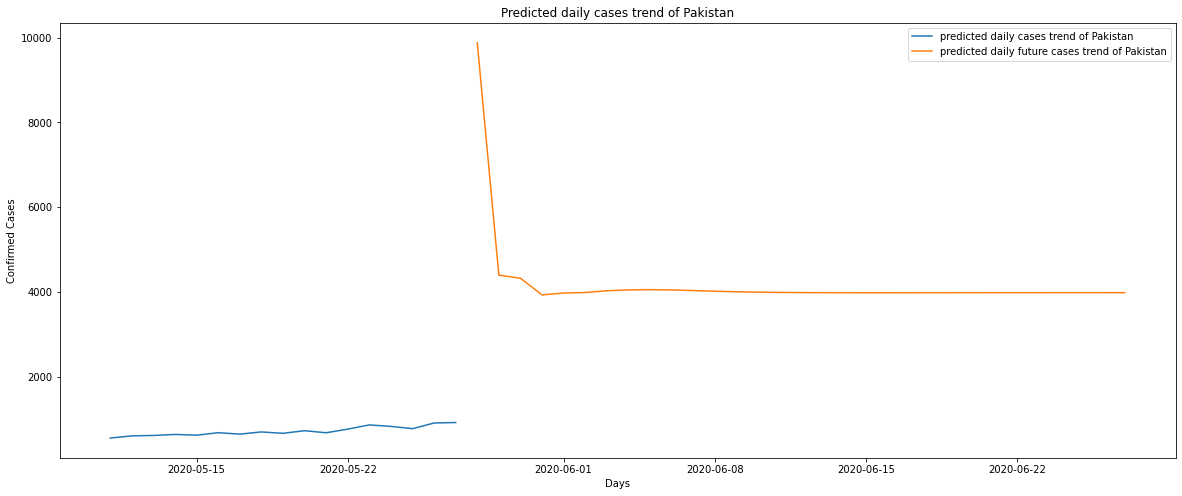

In [387]:
#Daily predicted cases of Pakistan according to Colombia till 27th June 2020

hist_data_index = pd.date_range(
  start= '2020-05-10',
  end = '2020-05-27',
  closed='right'
)

daily_cases_five_countries = pd.Series(
  data= pak_predictions_Colombia,
  index= hist_data_index
)

#Days in Future
Pak_future_index = pd.date_range(
  start= '2020-05-27',
  end = '2020-06-27',
  closed='right'
)


Pak_future = pd.Series(
  data=Colombia_outputs,
  index=Pak_future_index
)

plt.figure(figsize=(20,8))
plt.title('Predicted daily cases trend of Pakistan')
plt.xlabel('Days')
plt.ylabel('Confirmed Cases')
plt.plot(daily_cases_five_countries, label='predicted daily cases trend of Pakistan')
plt.plot(Pak_future, label='predicted daily future cases trend of Pakistan')
plt.legend()

**4. According to Peru**

`Training`

In [363]:
#Training the model according to the Dataset of Peru

LSTM_model = LSTM()
loss_function = nn.MSELoss()
optimizer = optim.Adam(LSTM_model.parameters(), lr=0.01)
num_losses = 0

for epoch in range(100):
  for i, batch in enumerate(Peru_dataset_train):
    data, labels = batch
    optimizer.zero_grad()
    LSTM_model.hidden_cell = (torch.zeros(1, 1, LSTM_model.hidden_layer_size),
                          torch.zeros(1, 1, LSTM_model.hidden_layer_size))
    preds = LSTM_model(data)

    loss = loss_function(preds, labels)
    loss.backward()

    
    optimizer.step()

    num_losses += loss.item()
    
  if epoch%10 == 0:
    print("Epoch: ",epoch+10,"           ","Training Loss: ",num_losses)
  num_losses = 0
   

Epoch:  10             Training Loss:  49.287993231169175
Epoch:  20             Training Loss:  146.35407202914212
Epoch:  30             Training Loss:  90.76905337473798
Epoch:  40             Training Loss:  62.85198483181557
Epoch:  50             Training Loss:  36.97004882095575
Epoch:  60             Training Loss:  41.06460253718807
Epoch:  70             Training Loss:  24.550114435041678
Epoch:  80             Training Loss:  26.64614527755782
Epoch:  90             Training Loss:  100.19351606523014
Epoch:  100             Training Loss:  50.240763393668786


`Predicting for Pakistan from 10th May till 27th May`

In [364]:
#Evaluating the already trained model on the data of Pakistan and predicting trend in Pakistan between 10th may till 27th may

predictions = []
LSTM_model.eval()
for data in Peru_training_data:
  with torch.no_grad():
    pred = LSTM_model3(data)
    predictions.append(pred)

#Inversing the previously transformed dataset so, that the outputs predicted can be according to the original value
pak_predictions_Peru = scaling.inverse_transform(np.expand_dims(predictions, axis=0)).flatten()
pak_predictions_Peru = pak_predictions_Peru[-17:]
print(pak_predictions_Peru)

[4012.669  4177.428  5026.907  3916.7341 4360.1235 4490.8345 4121.15
 3989.8608 4540.874  5033.24   3920.4062 4155.685  4277.74   4856.79
 3939.889  5313.6245 5946.175 ]


`Predicting for Pakistan from 27th May till 27th June`

In [365]:
#For forecasting we would keep the data of last 31 days from the training set 
#These would predict 31 days in the future of Pakistan

days_in_future = 31
prediction = []
Peru_outputs = Peru_daily_cases[-days_in_future:].tolist()


LSTM_model.eval()
for i in range (days_in_future):
  pred_list = torch.FloatTensor(Peru_outputs[-days_in_future:])

  with torch.no_grad():
    pred = LSTM_model(pred_list)
    pred_item = pred.item()
    Peru_outputs.append(pred_item)

Peru_outputs = scaling.inverse_transform(np.expand_dims(Peru_outputs[-days_in_future:], axis=0)).flatten()
print(Peru_outputs)




[5480.15306473 1828.53914738 2051.21545553 1947.01065063 2795.79534769
 4041.51132584 3688.52113724 3692.82520771 3594.8473978  3719.42938805
 3654.23306942 3688.56105804 3665.61614037 3679.78412151 3671.91581726
 3676.32012367 3673.95177841 3675.07997513 3674.61437702 3674.72242355
 3674.76841927 3674.64518547 3674.76755142 3674.64344978 3674.73153591
 3674.64735508 3674.69378471 3674.64084625 3674.63520527 3674.40783024
 3674.54277992]


`Graph`

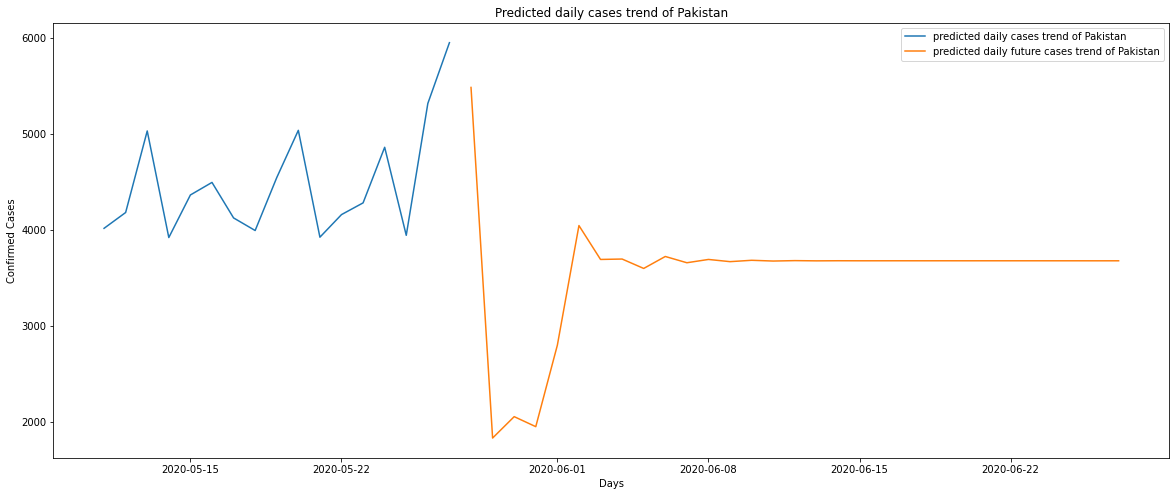

In [366]:
#Daily predicted cases of Pakistan according to Peru till 27th June 2020

hist_data_index = pd.date_range(
  start= '2020-05-10',
  end = '2020-05-27',
  closed='right'
)

daily_cases_five_countries = pd.Series(
  data= pak_predictions_Peru,
  index= hist_data_index
)

#Days in Future
Pak_future_index = pd.date_range(
  start= '2020-05-27',
  end = '2020-06-27',
  closed='right'
)


Pak_future = pd.Series(
  data=Peru_outputs,
  index=Pak_future_index
)

plt.figure(figsize=(20,8))
plt.title('Predicted daily cases trend of Pakistan')
plt.xlabel('Days')
plt.ylabel('Confirmed Cases')
plt.plot(daily_cases_five_countries, label='predicted daily cases trend of Pakistan')
plt.plot(Pak_future, label='predicted daily future cases trend of Pakistan')
plt.legend()

**5. According to Egypt**

`Training`

In [367]:
#Training the model according to the Dataset of Egypt

LSTM_model = LSTM()
loss_function = nn.MSELoss()
optimizer = optim.Adam(LSTM_model.parameters(), lr=0.01)
num_losses = 0

for epoch in range(100):
  for i, batch in enumerate(Egypt_dataset_train):
    data, labels = batch
    optimizer.zero_grad()
    LSTM_model.hidden_cell = (torch.zeros(1, 1, LSTM_model.hidden_layer_size),
                          torch.zeros(1, 1, LSTM_model.hidden_layer_size))
    preds = LSTM_model(data)

    loss = loss_function(preds, labels)
    loss.backward()

    
    optimizer.step()

    num_losses += loss.item()
    
  if epoch%10 == 0:
    print("Epoch: ",epoch+10,"           ","Training Loss: ",num_losses)
  num_losses = 0
   

Epoch:  10             Training Loss:  1.0048543891473356
Epoch:  20             Training Loss:  0.7485325278582167
Epoch:  30             Training Loss:  0.23486937388590157
Epoch:  40             Training Loss:  0.27430229600861367
Epoch:  50             Training Loss:  0.3133161868772376
Epoch:  60             Training Loss:  0.385952239761707
Epoch:  70             Training Loss:  0.35435652013524077
Epoch:  80             Training Loss:  0.2733311626985824
Epoch:  90             Training Loss:  0.24234701274917958
Epoch:  100             Training Loss:  0.27241359125636017


`Predicting for Pakistan from 10th May till 27th May`

In [368]:
#Evaluating the already trained model on the data of Pakistan and predicting trend in Pakistan between 10th may till 27th may

predictions = []
LSTM_model.eval()
for data in Egypt_training_data:
  with torch.no_grad():
    pred = LSTM_model(data)
    predictions.append(pred)

#Inversing the previously transformed dataset so, that the outputs predicted can be according to the original value
pak_predictions_Egypt = scaling.inverse_transform(np.expand_dims(predictions, axis=0)).flatten()
pak_predictions_Egypt = pak_predictions_Egypt[-17:]
print(pak_predictions_Egypt)

[ 446.80313  481.3717   485.22546  557.42584  551.81335  661.6726
  664.79156  678.2925   919.34753  915.5821   861.2872   820.4327
  744.2294   808.0953   766.87     900.3983  1083.3348 ]


`Predicting for Pakistan from 27th May till 27th June`

In [369]:
#For forecasting we would keep the data of last 31 days from the training set 
#These would predict 31 days in the future of Pakistan

days_in_future = 31
prediction = []
Egypt_outputs = Egypt_daily_cases[-days_in_future:].tolist()


LSTM_model.eval()
for i in range (days_in_future):
  pred_list = torch.FloatTensor(Egypt_outputs[-days_in_future:])

  with torch.no_grad():
    pred = LSTM_model(pred_list)
    pred_item = pred.item()
    Egypt_outputs.append(pred_item)

Egypt_outputs = scaling.inverse_transform(np.expand_dims(Egypt_outputs[-days_in_future:], axis=0)).flatten()
print(Egypt_outputs)




[4531.35047436 2532.22928524 1190.79905033  420.90190858  213.61347139
  350.5640775   496.7083478   649.7480154   835.62167883 1088.41150999
 1379.61676478 1593.77117395 1680.66358328 1669.237988   1601.16585255
 1509.33931828 1417.99801707 1344.03658628 1296.37917042 1276.35888577
 1280.63757181 1303.75345469 1339.05017376 1379.28492308 1417.66639233
 1448.96799326 1470.23450136 1480.93371153 1482.59942889 1478.10909748
 1470.7321012 ]


`Graph`

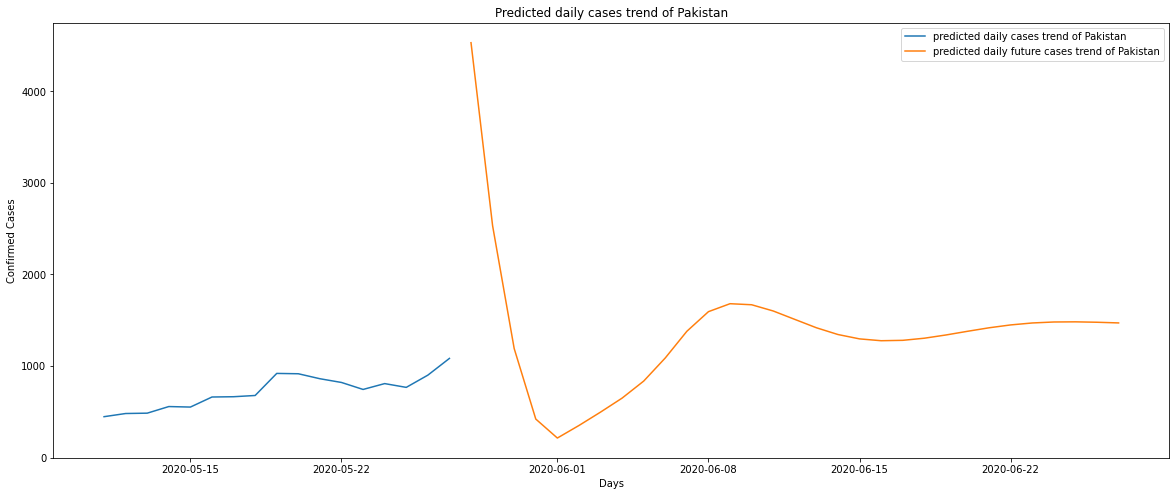

In [396]:
#Daily predicted cases of Pakistan according to Egypt till 27th June 2020

hist_data_index = pd.date_range(
  start= '2020-05-10',
  end = '2020-05-27',
  closed='right'
)

daily_cases_five_countries = pd.Series(
  data= pak_predictions_Egypt,
  index= hist_data_index
)

#Days in Future
Pak_future_index = pd.date_range(
  start= '2020-05-27',
  end = '2020-06-27',
  closed='right'
)


Pak_future = pd.Series(
  data=Egypt_outputs,
  index=Pak_future_index
)

plt.figure(figsize=(20,8))
plt.title('Predicted daily cases trend of Pakistan')
plt.xlabel('Days')
plt.ylabel('Confirmed Cases')
plt.plot(daily_cases_five_countries, label='predicted daily cases trend of Pakistan')
plt.plot(Pak_future, label='predicted daily future cases trend of Pakistan')
plt.legend()
print("\n\n")

**Part 4**

---



In [388]:

print("Daily predicted cases for Pakistan from 10-05-2020 til 27-06-2020 according to Saudia are as follows: ","\n")

index = pd.date_range(start='2020-05-10', periods=48)
a = np.concatenate(( pak_predictions_Saudia.astype(int).reshape((-1,1)),Saudia_outputs.astype(int).reshape((-1,1)) ), axis=0)
df1 = pd.DataFrame(columns=["Days","New Cases"], index=index)
days = []
for i in range(len(a)):
  days.append(df1.index[i] - df1.index[0])
  df1["Days"].iloc[i] = days[i].days
  df1["New Cases"].iloc[i] = a[i]

print(df1)

print("\n\n")



print("Daily predicted cases for Pakistan from 10-05-2020 til 27-06-2020 according to Qatar are as follows: ","\n")

index = pd.date_range(start='2020-05-10', periods=48)
a = np.concatenate(( pak_predictions_Qatar.astype(int).reshape((-1,1)),Qatar_outputs.astype(int).reshape((-1,1)) ), axis=0)
df1 = pd.DataFrame(columns=["Days","New Cases"], index=index)
days = []
for i in range(len(a)):
  days.append(df1.index[i] - df1.index[0])
  df1["Days"].iloc[i] = days[i].days
  df1["New Cases"].iloc[i] = a[i]

print(df1)

print("\n\n")


print("Daily predicted cases for Pakistan from 10-05-2020 til 27-06-2020 according to Columbia are as follows: ","\n")

index = pd.date_range(start='2020-05-10', periods=48)
a = np.concatenate(( pak_predictions_Colombia.astype(int).reshape((-1,1)),Colombia_outputs.astype(int).reshape((-1,1)) ), axis=0)
df1 = pd.DataFrame(columns=["Days","New Cases"], index=index)
days = []
for i in range(len(a)):
  days.append(df1.index[i] - df1.index[0])
  df1["Days"].iloc[i] = days[i].days
  df1["New Cases"].iloc[i] = a[i]

print(df1)

print("\n\n")


print("Daily predicted cases for Pakistan from 10-05-2020 til 27-06-2020 according to Peru are as follows: ","\n")

index = pd.date_range(start='2020-05-10', periods=48)
a = np.concatenate(( pak_predictions_Peru.astype(int).reshape((-1,1)), Peru_outputs.astype(int).reshape((-1,1)) ), axis=0)
df1 = pd.DataFrame(columns=["Days","New Cases"], index=index)
days = []
for i in range(len(a)):
  days.append(df1.index[i] - df1.index[0])
  df1["Days"].iloc[i] = days[i].days
  df1["New Cases"].iloc[i] = a[i]

print(df1)

print("\n\n")


print("Daily predicted cases for Pakistan from 10-05-2020 til 27-06-2020 according to Egypt are as follows: ","\n")

index = pd.date_range(start='2020-05-10', periods=48)
a = np.concatenate(( pak_predictions_Egypt.astype(int).reshape((-1,1)), Egypt_outputs.astype(int).reshape((-1,1)) ), axis=0)
df1 = pd.DataFrame(columns=["Days","New Cases"], index=index)
days = []
for i in range(len(a)):
  days.append(df1.index[i] - df1.index[0])
  df1["Days"].iloc[i] = days[i].days
  df1["New Cases"].iloc[i] = a[i]

print(df1)

print("\n\n\n")




Daily predicted cases for Pakistan from 10-05-2020 til 27-06-2020 according to Saudia are as follows:  

           Days New Cases
2020-05-10    0    [2079]
2020-05-11    1    [2020]
2020-05-12    2    [2055]
2020-05-13    3    [2314]
2020-05-14    4    [2608]
2020-05-15    5    [2840]
2020-05-16    6    [2756]
2020-05-17    7    [2715]
2020-05-18    8    [2675]
2020-05-19    9    [2779]
2020-05-20   10    [2669]
2020-05-21   11    [2760]
2020-05-22   12    [2602]
2020-05-23   13    [2618]
2020-05-24   14    [2395]
2020-05-25   15    [1871]
2020-05-26   16    [1976]
2020-05-27   17    [3039]
2020-05-28   18    [2190]
2020-05-29   19    [2003]
2020-05-30   20    [2299]
2020-05-31   21    [2677]
2020-06-01   22    [2874]
2020-06-02   23    [2920]
2020-06-03   24    [2939]
2020-06-04   25    [2954]
2020-06-05   26    [2967]
2020-06-06   27    [2977]
2020-06-07   28    [2985]
2020-06-08   29    [2992]
2020-06-09   30    [2998]
2020-06-10   31    [3004]
2020-06-11   32    [3008]
2020-06-12 

**Part 5**

---



In [389]:
from sklearn.metrics import mean_squared_error

print("MSE for Saudia: ", mean_squared_error(Pakistan_daily_cases, pak_predictions_Saudia))
print("MSE for Qatar: ", mean_squared_error(Pakistan_daily_cases, pak_predictions_Qatar))
print("MSE for Colombia: ", mean_squared_error(Pakistan_daily_cases, pak_predictions_Colombia))
print("MSE for Peru: ", mean_squared_error(Pakistan_daily_cases, pak_predictions_Peru))
print("MSE for Egypt: ", mean_squared_error(Pakistan_daily_cases, pak_predictions_Egypt))


MSE for Saudia:  1118778.8251300673
MSE for Qatar:  655274.4312360166
MSE for Colombia:  1478947.9239095417
MSE for Peru:  8677124.740158634
MSE for Egypt:  1451525.9870157382


***Part 6.***
Use Pakistan's data to predict 31 days into future

---





In [0]:
#Data Pre-processing

pak_dataset = dataset.loc[dataset["Country/Region"] == "Pakistan"]
pak_dataset = pak_dataset.drop(['Country/Region','Province/State','Lat','Long'], axis=1)
pak_dataset = pak_dataset.sum(axis=0)
pak_dataset = abs(pak_dataset.diff().fillna(pak_dataset[0]).astype(np.int64))
# print(pak_dataset)



In [0]:
scaling = MinMaxScaler()
scaling = scaling.fit(np.expand_dims(pak_dataset, axis=1))
training_data = scaling.transform(np.expand_dims(pak_dataset, axis=1))

training_data = torch.FloatTensor(training_data)
input = create_datasets(training_data,10)

In [0]:
LSTM_model2 = LSTM()
loss_function = nn.MSELoss()
optimizer = optim.Adam(LSTM_model2.parameters(), lr=0.01)

In [381]:
#Traning Model with the dataset of Pakistan


num_losses1 = 0
for epoch in range(100):
  for i, batch in enumerate(input):
    optimizer.zero_grad()
    data, labels = batch
    LSTM_model2.hidden_cell = (torch.zeros(1, 1, LSTM_model2.hidden_layer_size),
                          torch.zeros(1, 1, LSTM_model2.hidden_layer_size))
    preds = LSTM_model2(data)

    loss = loss_function(preds, labels)

    
    loss.backward()
    optimizer.step()

    num_losses1 += loss.item()
    
  if epoch%10 == 0:
    print("Epoch: ",epoch+10,"           ","Training Loss: ",num_losses1)
  num_losses1 = 0


Epoch:  10             Training Loss:  0.5495725499905006
Epoch:  20             Training Loss:  0.6534555240419495
Epoch:  30             Training Loss:  0.8642648874201281
Epoch:  40             Training Loss:  1.0957912685676803
Epoch:  50             Training Loss:  0.48470424891632025
Epoch:  60             Training Loss:  0.9041113535829766
Epoch:  70             Training Loss:  0.5732056599954802
Epoch:  80             Training Loss:  0.6788611794039525
Epoch:  90             Training Loss:  0.4982532615155151
Epoch:  100             Training Loss:  0.6465265861418459


In [382]:
#Predicting the values of future on data of pakistan


days_in_future = 31
outputs = pak_dataset[-days_in_future:].tolist()

LSTM_model2.eval()
for i in range (days_in_future):
  pred_list = torch.FloatTensor(outputs[-days_in_future:])

  with torch.no_grad():
    pred = LSTM_model2(pred_list)
    pred_item = pred.item()
    outputs.append(pred_item)

outputs = scaling.inverse_transform(np.expand_dims(outputs[-days_in_future:], axis=0)).flatten()
print(outputs)


[2947.22979009 3651.88158226 4355.61843848  725.3489875   497.97766858
 2533.76578504   23.61353123 1462.43851635 1921.88900036 1897.28964269
 2181.15507072 2439.56668639 2893.31389618 2557.73017931 2085.99545085
 1989.7258116  2789.58801353 2079.70109355 1332.33652714 3000.65411681
 1007.72952905 1567.72533572 2106.00254077 1638.94999433 2608.08467877
 3049.99371576 3156.65249038 3239.09722853 2653.29199052 2145.06373709
 2473.9020896 ]


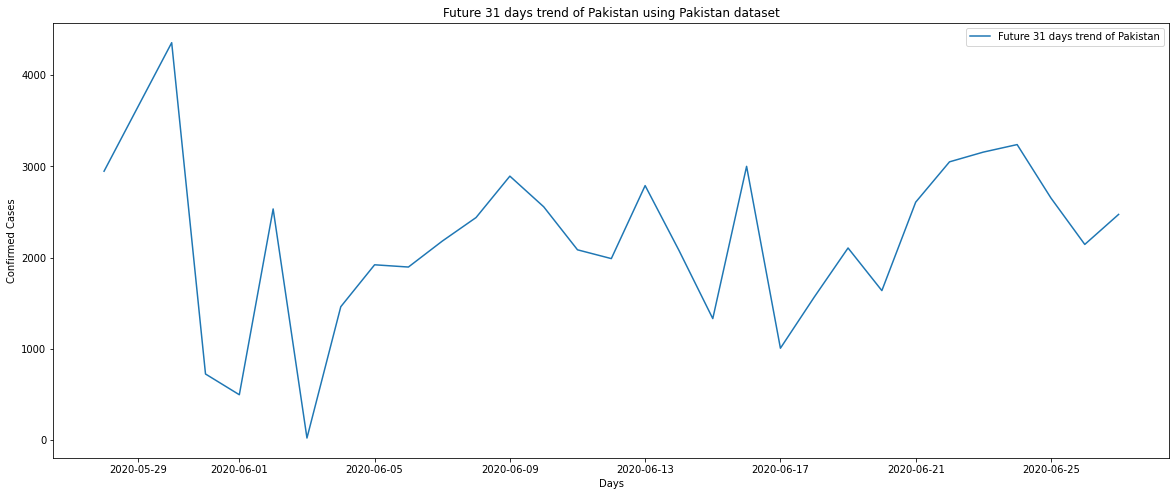

In [383]:
#Plotting graph

Pak_future_index = pd.date_range(
  start= '2020-05-27',
  periods = days_in_future+1,
  closed='right'
)

Pak_future = pd.Series(
  data=outputs,
  index=Pak_future_index
)

plt.figure(figsize=(20,8))
plt.title('Future 31 days trend of Pakistan using Pakistan dataset')
plt.xlabel('Days')
plt.ylabel('Confirmed Cases')
plt.plot(Pak_future, label='Future 31 days trend of Pakistan')
plt.legend()
print("\n\n")

***Part 7.***
Graph of predicted cases of Pakistan in future according to top five countries starting from 27th May till 27th June. 31 days

---






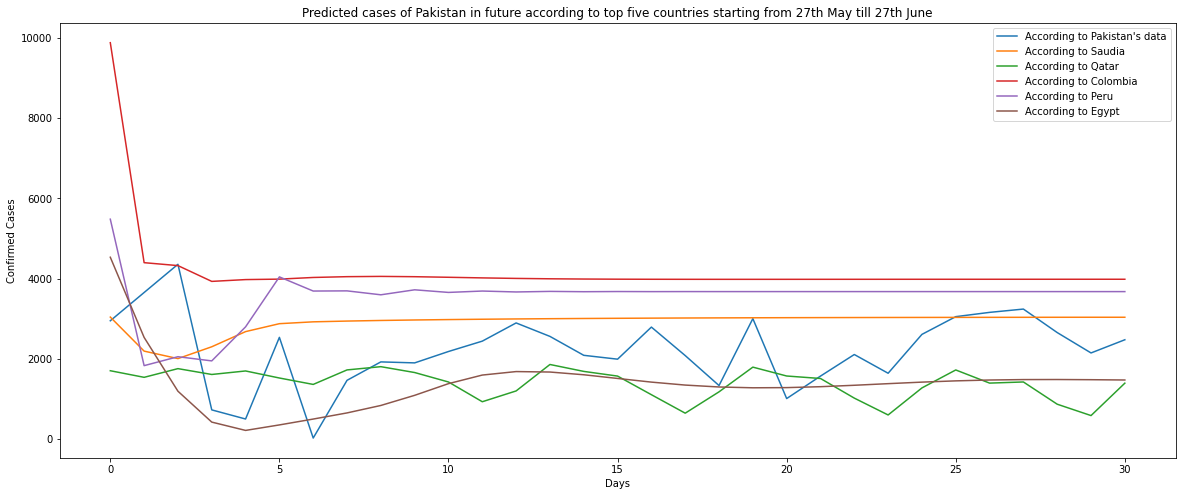

In [394]:

index = pd.date_range(
  start= '2020-05-27',
  periods = days_in_future+1,
  closed='right'
)

plt.figure(figsize=(20,8))
plt.title("Predicted cases of Pakistan in future according to top five countries starting from 27th May till 27th June")
plt.xlabel('Days')
plt.ylabel('Confirmed Cases')
plt.plot(outputs, label='According to Pakistan\'s data')
plt.plot(Saudia_outputs, label='According to Saudia')
plt.plot(Qatar_outputs, label='According to Qatar')
plt.plot(Colombia_outputs, label='According to Colombia')
plt.plot(Peru_outputs, label='According to Peru')
plt.plot(Egypt_outputs, label='According to Egypt')

plt.legend()


***Part 7.1.***
The best prediction by Qatar

---



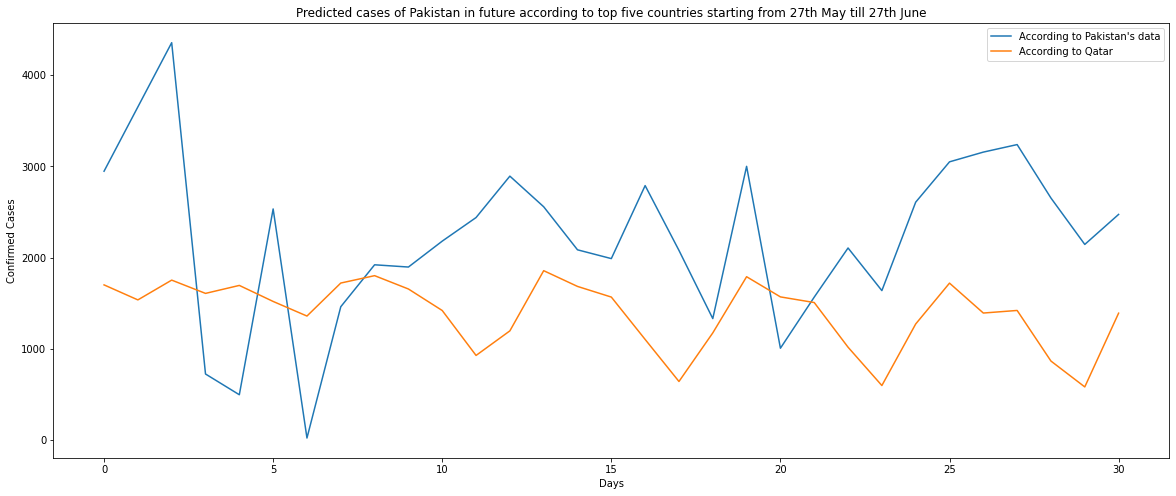

In [400]:
plt.figure(figsize=(20,8))
plt.title("Predicted cases of Pakistan in future according to top five countries starting from 27th May till 27th June")
plt.xlabel('Days')
plt.ylabel('Confirmed Cases')
plt.plot(outputs, label='According to Pakistan\'s data')
plt.plot(Qatar_outputs, label='According to Qatar')


plt.legend()


***Part 7.2.***
Graph of predictions for Pakistan from 10th May till 27th May. 17 days

---



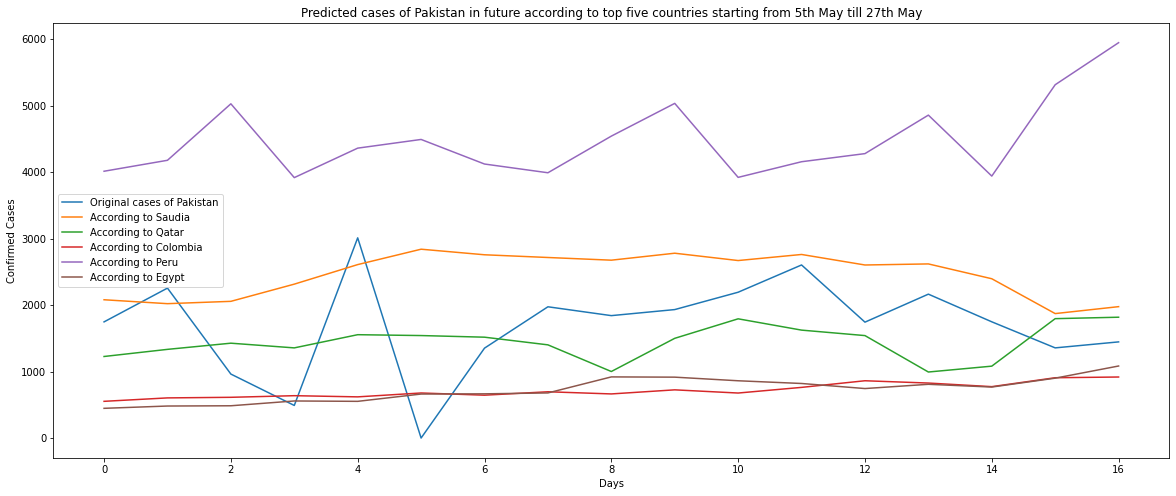

In [397]:
index = pd.date_range(
  start= '2020-05-10',
  end = '2020-05-27',
  closed='right'
)

plt.figure(figsize=(20,8))
plt.title("Predicted cases of Pakistan in future according to top five countries starting from 5th May till 27th May")
plt.xlabel('Days')
plt.ylabel('Confirmed Cases')
plt.plot(Pakistan_daily_cases.tolist(), label= 'Original cases of Pakistan')
plt.plot(pak_predictions_Saudia, label='According to Saudia')
plt.plot(pak_predictions_Qatar, label='According to Qatar')
plt.plot(pak_predictions_Colombia, label='According to Colombia')
plt.plot(pak_predictions_Peru, label='According to Peru')
plt.plot(pak_predictions_Egypt, label='According to Egypt')

plt.legend()